<a href="https://colab.research.google.com/github/HemantRajSingh/MovieMatch/blob/master/ExploratoryData_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# import string library for text preprocessing
import string

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv('../data/processed/preprocessed_dataset.csv')
df.head()

,title,year,image_link,imdb_id,rating_count,rating,genre,keywords,trailer_link,actors,director,synopsis,processed_plot
0,Gladiator,2000,https://m.media-amazon.com/images/M/MV5BMDliMm...,tt0172495,1617220,8.5,"[Action, Adventure, Drama]","[roman empire, gladiator, slavery, combat, bat...",https://www.imdb.com/video/vi2628367897/,"[Russell Crowe, Joaquin Phoenix, Connie Nielsen]",[Ridley Scott],"Shouting ""Roma Invicta!"" as his forces attack,...",shouting rom invicta force attack general maxi...
1,Unbreakable,2000,https://m.media-amazon.com/images/M/MV5BMDIwMj...,tt0217869,440860,7.3,"[Drama, Mystery, Sci-Fi]","[supernatural power, train crash, superhero, c...",https://www.imdb.com/video/vi1103346201/,"[Bruce Willis, Samuel L. Jackson, Robin Wright]",[M. Night Shyamalan],The film opens as we see a baby being born in ...,film open see baby born west philadelphia elij...
2,Snatch,2000,https://m.media-amazon.com/images/M/MV5BMTA2ND...,tt0208092,909299,8.2,"[Comedy, Crime]","[diamond, boxer, narrated by character, cockne...",https://www.imdb.com/video/vi1558577433/,"[Jason Statham, Brad Pitt, Stephen Graham]",[Guy Ritchie],After stealing an 86-carat (17 g) diamond in a...,stealing carat g diamond heist antwerp franki...
3,AmericanPsycho,2000,https://m.media-amazon.com/images/M/MV5BZTM2ZG...,tt0144084,713635,7.6,"[Crime, Drama, Horror]","[narcissism, materialism, serial murder, socio...",https://www.imdb.com/video/vi4060743449/,"[Christian Bale, Justin Theroux, Josh Lucas]",[Mary Harron],A white background. Red drops begin to fall pa...,white background red drop begin fall past open...
4,RequiemforaDream,2000,https://m.media-amazon.com/images/M/MV5BOTdiNz...,tt0180093,897414,8.3,[Drama],"[drug addiction, sex show, sex scene, prostitu...",https://www.imdb.com/video/vi2156069145/,"[Ellen Burstyn, Jared Leto, Jennifer Connelly]",[Darren Aronofsky],Harry Goldfarb (Jared Leto) and Tyrone Love (M...,harry goldfarb jared leto tyrone love marlon w...


In [4]:
df.tail()

,title,year,image_link,imdb_id,rating_count,rating,genre,keywords,trailer_link,actors,director,synopsis,processed_plot
7548,Giannis:TheMarvelousJourney,2024,https://m.media-amazon.com/images/M/MV5BZjMyOT...,tt30895834,1011,8.4,"[Sport, Documentary]",[],https://www.imdb.com/video/vi4031760153/,"[Giannis Antetokounmpo, Alex Antetokounmpo, Ko...",[Kristen Lappas],"The story of Giannis Antetokounmpo, global NBA...",story giannis antetokounmpo global nba superst...
7549,ProjectDorothy,2024,https://m.media-amazon.com/images/M/MV5BMTM1YT...,tt8651780,1854,6.0,"[Horror, Sci-Fi, Thriller]",[monster],https://www.imdb.com/video/vi1628358425/,"[Danielle Harris, Tim DeZarn, Adam Budron]",[George Henry Horton],"After a botched robbery, two men take refuge i...",botched robbery two men take refuge remote lif...
7550,Reloaded,2024,https://m.media-amazon.com/images/M/MV5BYTNmMT...,tt15352048,531,8.5,"[Action, Crime, Romance]","[dystopia, detective]",https://www.imdb.com/video/vi1568524057/,"[George Tounas, Viktoria Castellano, Jannis Sky]",[George Tounas],In a dystopian future where criminals take ove...,dystopian future criminal take detective jimmy...
7551,JacquelineNovak:GetonYourKnees,2024,https://m.media-amazon.com/images/M/MV5BOTU0OG...,tt30402897,643,6.6,"[Documentary, Comedy]","[whirlwind delivery, manic energy level, cereb...",https://www.imdb.com/video/vi3579168537/,[Jacqueline Novak],[Natasha Lyonne],Comedian Jacqueline Novak delivers a funny and...,comedian jacqueline novak delivers funny philo...
7552,IrklaisperAtlanta,2024,https://m.media-amazon.com/images/M/MV5BNDdhMj...,tt30624233,540,9.2,[Documentary],[sea adventure],NaN,[Aurimas Valujavicius],[Aurimas Valujavicius],A Lithuanian rows solo across the Atlantic Oce...,lithuanian row solo across atlantic ocean km s...


# Understanding data

In [5]:
df.shape

(7553, 13)

In [6]:
df.columns

Index(['title', 'year', 'image_link', 'imdb_id', 'rating_count', 'rating',
       'genre', 'keywords', 'trailer_link', 'actors', 'director', 'synopsis',
       'processed_plot'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7553 entries, 0 to 7552
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           7553 non-null   object 
 1   year            7553 non-null   int64  
 2   image_link      7553 non-null   object 
 3   imdb_id         7553 non-null   object 
 4   rating_count    7553 non-null   int64  
 5   rating          7553 non-null   float64
 6   genre           7553 non-null   object 
 7   keywords        7553 non-null   object 
 8   trailer_link    6778 non-null   object 
 9   actors          7553 non-null   object 
 10  director        7553 non-null   object 
 11  synopsis        7553 non-null   object 
 12  processed_plot  7553 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 767.2+ KB


In [8]:
# total num of null values
df.isna().sum()

title               0
year                0
image_link          0
imdb_id             0
rating_count        0
rating              0
genre               0
keywords            0
trailer_link      775
actors              0
director            0
synopsis            0
processed_plot      0
dtype: int64


# Exploratory Data Analysis

In [9]:
#total count of years
df['year'].nunique()

25

In [10]:
#unique values for year column
df['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 2007, 2008, 2009,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024])

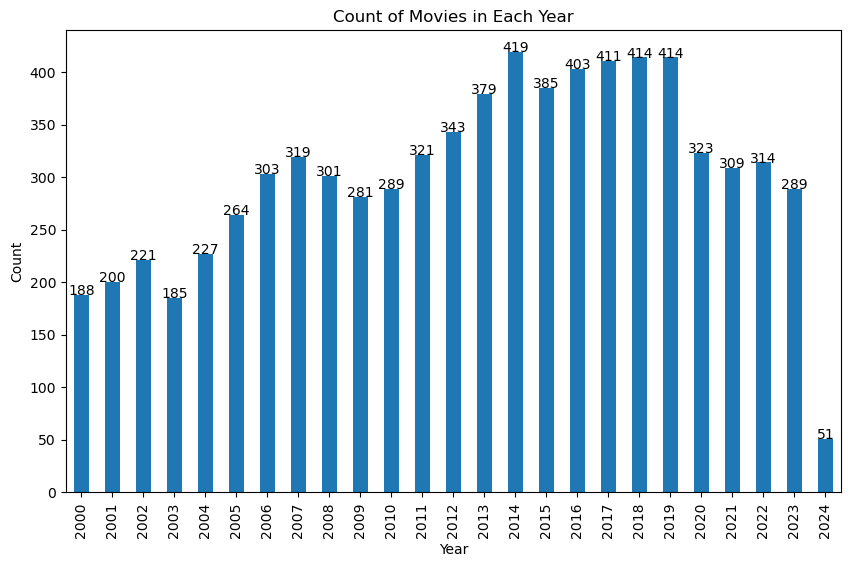

In [11]:
# Count of movies in each year
movie_counts = df['year'].value_counts()

plt.figure(figsize=(10, 6))
movie_counts.sort_index().plot(kind='bar')
plt.title('Count of Movies in Each Year')
plt.xlabel('Year')
plt.ylabel('Count')

for i, count in enumerate(movie_counts.sort_index()):
    plt.text(i, count, str(count), ha='center')

plt.show()

/Users/hemantrajsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


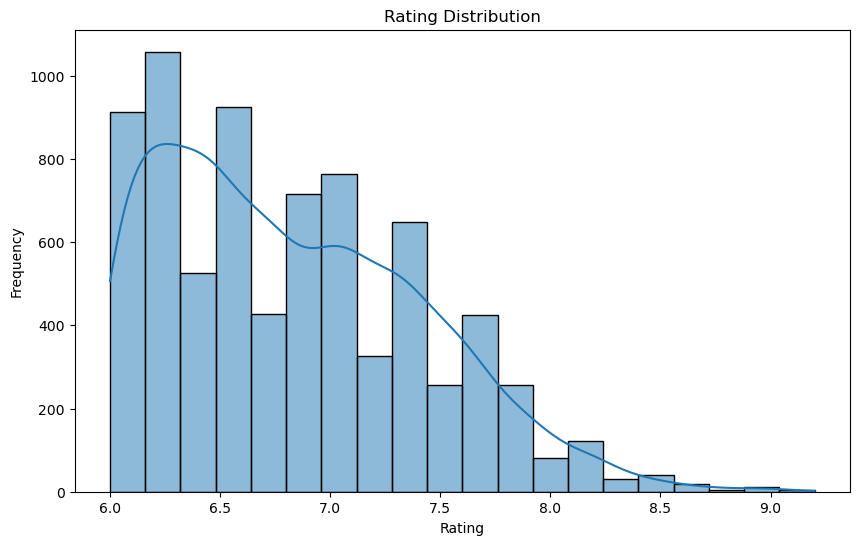

In [12]:
# Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

/Users/hemantrajsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hemantrajsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


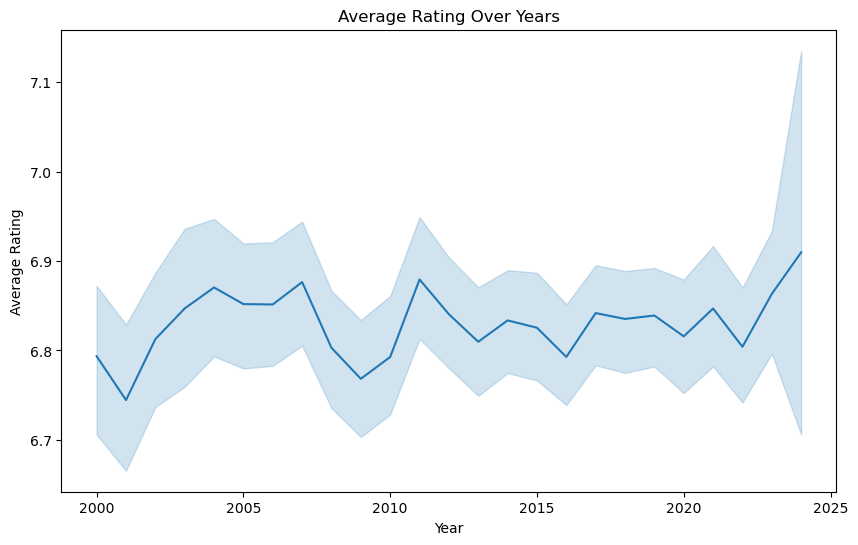

In [13]:
# Rating vs. Year
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='rating', data=df)
plt.title('Average Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

# Character count
# Word count
# Mean word length
# Mean sentence length

In [14]:
df['processed_plot'][0:2]

0    shouting rom invicta force attack general maxi...
1    film open see baby born west philadelphia elij...
Name: processed_plot, dtype: object

In [15]:
df['processed_plot'][0]

'shouting rom invicta force attack general maximus decimus meridius russell crowe lead roman army victory germanic barbarian year  ad ending prolonged war earning esteem elderly emperor marcus aurelius although dying aurelius son commodus joaquin phoenix decides appoint temporary leadership morallyupstanding maximus desire eventually return power roman senate aurelius informs maximus offer time consider informing commodus bout jealousy murder fatherdeclaring emperor commodus asks maximus loyalty maximus realizing commodus involvement emperor death refuse commodus order maximus execution dispatch praetorian guard murder maximus wife son maximus narrowly escape execution race home discover family charred crucified body smoldering ruin villa burying wife son grieving maximus succumbs exhaustion collapse gravesslave trader find maximus take zucchabar rugged province north africa purchased proximo head local gladiator school distraught nihilistic death family betrayal empire maximus initial

In [16]:
length = len(df['processed_plot'][0])
length

3693

The length of our sample review is 3693

In [17]:
df['length'] = df['processed_plot'].str.len()

In [18]:
df['length'].describe()

count     7553.000000
mean      1838.445651
std       2974.579624
min          8.000000
25%        106.000000
50%        184.000000
75%       2994.000000
max      39867.000000
Name: length, dtype: float64

In [19]:
df[['title', 'rating_count', 'rating']].head()

,title,rating_count,rating
0,Gladiator,1617220,8.5
1,Unbreakable,440860,7.3
2,Snatch,909299,8.2
3,AmericanPsycho,713635,7.6
4,RequiemforaDream,897414,8.3


In [20]:
df[['title', 'rating', 'rating_count', 'year']].sort_values(by='rating', ascending=False).head(10)

,title,rating,rating_count,year
7552,IrklaisperAtlanta,9.2,540,2024
2932,Wendigo,9.1,2407,2011
7457,RiverBeauty,9.1,770,2023
2723,DoraleousandAssociates,9.0,511,2010
4618,TheEpicJourney,9.0,892,2015
1908,TheDarkKnight,9.0,2866217,2008
6260,I'mNotSurprised,9.0,736,2019
611,TheLordoftheRings:TheReturnoftheKing,9.0,1976092,2003
7128,TheBeatles:GetBack-TheRooftopConcert,9.0,1512,2022
6835,OnceUponaLifetime,8.9,866,2021


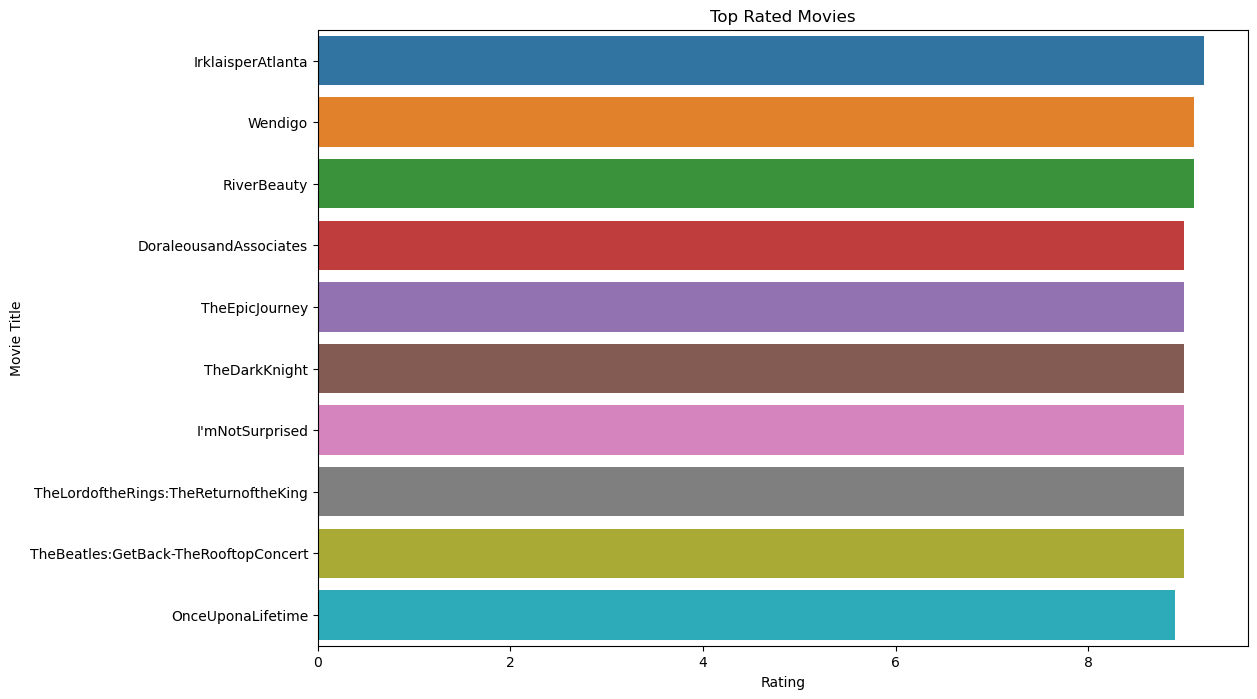

In [21]:
# Top Rated Movies
top_rated_movies = df.sort_values(by='rating', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='rating', y='title', data=top_rated_movies)
plt.title('Top Rated Movies')
plt.xlabel('Rating')
plt.ylabel('Movie Title')
plt.show()

In [22]:
# top-rated movie for each year
top_movies = df.loc[df.groupby('year')['rating'].idxmax()]
top_movies['year_title'] = top_movies['year'].astype(str) + ': ' + top_movies['title']

fig = px.bar(top_movies, x='year_title', y='rating', hover_data=['title', 'year'], color='rating',
             labels={'rating':'Rating', 'year_title':'Year: Title'},
             title='Top Rated Movie of Each Year')
fig.show()

In [23]:
print(df['genre'])

0       [Action, Adventure, Drama]
1         [Drama, Mystery, Sci-Fi]
2                  [Comedy, Crime]
3           [Crime, Drama, Horror]
4                          [Drama]
                   ...            
7548          [Sport, Documentary]
7549    [Horror, Sci-Fi, Thriller]
7550      [Action, Crime, Romance]
7551         [Documentary, Comedy]
7552                 [Documentary]
Name: genre, Length: 7553, dtype: object


In [24]:
genre_counts = df['genre'].value_counts().sort_values(ascending=False).head(10)
genre_counts

genre
[Documentary]                     811
[Drama]                           603
[Comedy, Drama, Romance]          317
[Comedy, Drama]                   308
[Drama, Romance]                  232
[Comedy]                          161
[Documentary, Biography]          158
[Animation, Adventure, Comedy]    152
[Comedy, Romance]                 149
[Documentary, Music]              141
Name: count, dtype: int64

In [25]:
len(genre_counts)

10

In [26]:
fig = px.pie(genre_counts, values=genre_counts, names=genre_counts.index, title='Distribution of Genre(s)')
fig.show()

In [27]:
df['processed_plot'][0]

'shouting rom invicta force attack general maximus decimus meridius russell crowe lead roman army victory germanic barbarian year  ad ending prolonged war earning esteem elderly emperor marcus aurelius although dying aurelius son commodus joaquin phoenix decides appoint temporary leadership morallyupstanding maximus desire eventually return power roman senate aurelius informs maximus offer time consider informing commodus bout jealousy murder fatherdeclaring emperor commodus asks maximus loyalty maximus realizing commodus involvement emperor death refuse commodus order maximus execution dispatch praetorian guard murder maximus wife son maximus narrowly escape execution race home discover family charred crucified body smoldering ruin villa burying wife son grieving maximus succumbs exhaustion collapse gravesslave trader find maximus take zucchabar rugged province north africa purchased proximo head local gladiator school distraught nihilistic death family betrayal empire maximus initial

# Corpus Build

In [28]:
def corpus(text):
    text_str=str(text)
    text_list = text_str.split()
    return text_list

In [29]:
df['corp_list'] = df['processed_plot'].apply(corpus)

In [50]:
df['corp_list'].head()

0    [shouting, rom, invicta, force, attack, genera...
1    [film, open, see, baby, born, west, philadelph...
2    [stealing, carat, g, diamond, heist, antwerp, ...
3    [white, background, red, drop, begin, fall, pa...
4    [harry, goldfarb, jared, leto, tyrone, love, m...
Name: corp_list, dtype: object

In [31]:
from tqdm import trange
corpus = []
for i in trange(df.shape[0],ncols=150):
    corpus+=df['corp_list'][i]
len(corpus)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 7553/7553 [00:00<00:00, 206738.53it/s]


2033472

In [32]:
from collections import Counter


mostCommon = Counter(corpus).most_common(10)
mostCommon

[('tell', 11861),
 ('go', 10870),
 ('get', 10333),
 ('one', 8758),
 ('find', 8752),
 ('back', 7999),
 ('take', 7927),
 ('say', 7377),
 ('see', 7347),
 ('time', 5802)]

In [33]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

/Users/hemantrajsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



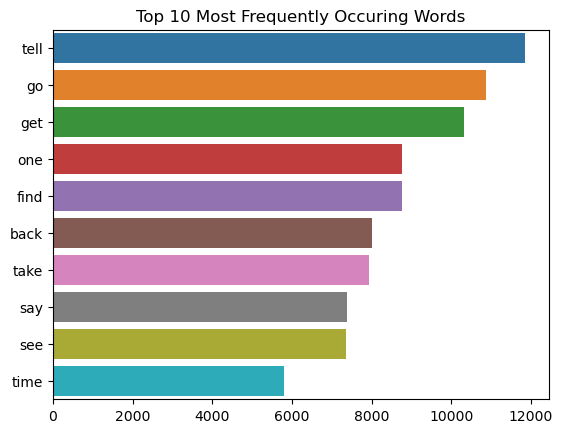

In [34]:
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

In [52]:
df['keywords'][0]

'[roman empire, gladiator, slavery, combat, battlefield]'

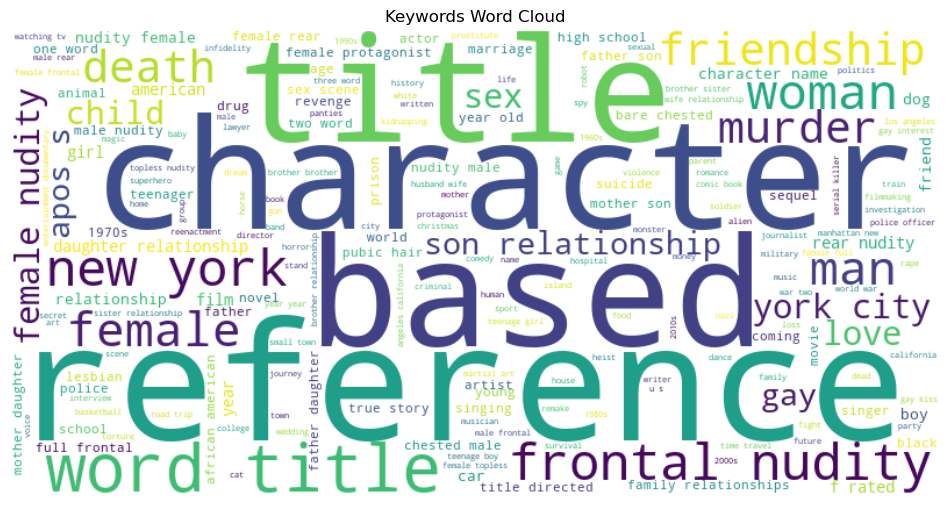

In [45]:
# Word Cloud for Keywords
from wordcloud import WordCloud

keywords_text = ' '.join(df['keywords'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords_text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Keywords Word Cloud')
plt.axis('off')
plt.show()

# ngramns

In [35]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['processed_plot'])


In [36]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

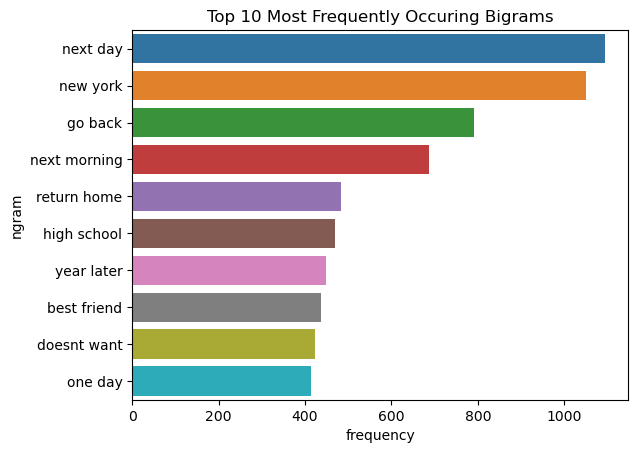

In [37]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [ ]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df['processed_plot'])
# Sum the occurrence of each feature without converting to dense array
count_values = np.array(trigrams.sum(axis=0)).ravel()
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

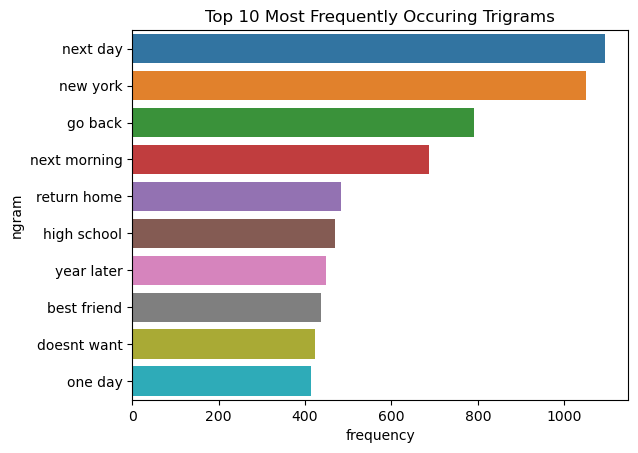

In [38]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()